In [10]:
# 관련 모듈과 라이브러리 import하기

# nn: 신경망 만들 때 쓰는 기본 도구들 (레이어, 활성화 함수 등)
import torch.nn as nn

# torch: 텐서 다루고 GPU 쓸 수 있게 해준다
import torch 

# datasets: 유명한 데이터셋 쉽게 다운받게 해줌
from torchvision import datasets

# transforms: 이미지를 모델이 먹을 수 있게 변환해줌(텐서로 변환하고 정규화)
from torchvision import transforms

# DataLoader: 데이터를 불러오는 애
from torch.utils.data import DataLoader

# numpy: 숫자 계산할 때 쓰는 라이브러리
import numpy as np

# optim: 모델을 학습시키는 최적화 알고리즘들 (경사하강법 등)
import torch.optim as optim 

# plt: 그래프 그리고 이미지 보여주는 애
import matplotlib.pyplot as plt

In [11]:
# MNIST 데이터셋 다운로드 및 불러오기

# 데이터셋을 저장할 경로 넣을 변수
download_root = 'MNIST_data/'

# 학습용 데이터셋
dataset1 = datasets.MNIST(root=download_root, 
                          train = True, 
                          # 이미지를 PyTorch FloatTensor로 변환
                          # 왜냐면 딥러닝 모델은 텐서 형태의 데이터만 알아먹음!
                          # 픽셀값을 0~1 범위로 정규화하기!
                          transform = transforms.ToTensor(),
                          download=True)

# 테스트용 데이터셋
dataset2 = datasets.MNIST(root=download_root,
                            # 학습용이 아니므로 이번에는 False!
                            train = False, 
                            transform = transforms.ToTensor(),
                            download=True)

In [12]:
# 모델 생성하기

# 첫번째 모델
# fully connected layer 

class FullyConnectNN(nn.Module):
    def __init__(self):
        # 부모 클래스의 생성자를 호출 -> 부모가 가진 기능들 쓸 수 있도록!
        super(FullyConnectNN, self).__init__()
        # 레이어 정의하기
        # 28x28 크기의 이미지를 1차원 벡터(784)로 바꿈
        # 은닉층의 뉴런 개수는 512개로 설정!
        # 첫번째 은닉층
        self.fc1 = nn.Linear(28*28, 512) # 입력층 -> 은닉층
        # 두번째 은닉층
        self.fc2 = nn.Linear(512, 512) # 은닉층 -> 은닉층
        self.fc3 = nn.Linear(512, 10)  # 은닉층 -> 출력층 (0~9 숫자 분류)
        # 활성화 함수로 ReLU 사용
        self.relu = nn.ReLU()

    # forward 메서드: 데이터가 모델을 통과할 때 어떻게 변하는지 정의
    def forward(self, x):
        x1 = self.fc1(x) # 첫번째 레이어 통과
        x2 = self.relu(x1) # ReLU 활성화 함수 적용
        x3 = self.fc2(x2) # 두번째 레이어 통과
        x4 = self.relu(x3) # ReLU 활성화 함수 적용
        x5 = self.fc3(x4) # 세번째 레이어 통과
        return x5

#두번째 모델
# 합성곱 신경망 (Convolutional Neural Network, CNN)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째 합성곱층: 입력 채널 1개(흑백), 출력 채널 32개, 커널 크기 3x3
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        # 두번째 합성곱층: 입력 채널 32개, 출력 채널 64개, 커널 크기 3x3
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # 세번째 합성곱층: 입력 채널 64개, 출력 채널 128개, 커널 크기 3x3
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        # 풀링층: 2x2 크기의 맥스 풀링
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # 완전 연결층: 입력 뉴런 128*3*3, 출력 뉴런 10 (0~9 숫자 분류)
        self.fc1 = nn.Linear(128 * 3 * 3, 10)
        # 활성화 함수로 ReLU 사용
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x) # 첫번째 합성곱층 통과
        x = self.relu(x) # ReLU 활성화 함수 적용
        x = self.pool(x) # 풀링층 통과

        x = self.conv2(x) # 두번째 합성곱층 통과
        x = self.relu(x) # ReLU 활성화 함수 적용
        x = self.pool(x) # 풀링층 통과

        x = self.conv3(x) # 세번째 합성곱층 통과
        x = self.relu(x) # ReLU 활성화 함수 적용
        x = self.pool(x) # 풀링층 통과

        x = x.view(-1, 128 * 3 * 3) # fully connected layer에 넣기 위해 1차원 벡터로 쫙쫙 피기
        x = self.fc1(x) # 완전 연결층 통과
        return x

In [20]:
# Batch 사이즈 설정하기 (한 번에 얼마나 많은 데이터 처리할지)
batch = 100
# DataLoader로 데이터셋 불러오기
train_Loader = DataLoader(dataset=dataset1, batch_size = batch, shuffle = True)
test_Loader = DataLoader(dataset=dataset2, batch_size = batch, shuffle = False)

In [21]:
# Loss function과 optimizer 설정하기

# 모델 생성하기 (기본 = FullyConnectNN. 선택사항 CNN)
model = FullyConnectNN()
# 모델이 가진 모든 파라미터의 기울기를 0으로 초기화
model.zero_grad()
# 손실 함수로 CrossEntropyLoss 사용 (분류 문제에 적합한 것!)
loss_function = nn.CrossEntropyLoss()
# optimizer로 SGD 사용, 학습률은 0.01
optimizer = optim.SGD(model. parameters(), lr = 0.01)

In [22]:
# epoch 설정하기

# 6만장을 100개씩 나누면 총 몇 번의 배치가 필요한지 계산
# 배치 사이즈 = 100 -> 총 600번의 배치 필요
total_batch = len(train_Loader)

epochs = np.arange(1, 11)  # 1부터 10까지의 epoch 설정

In [23]:
# MNIST Dataset Training and Inference

loss_list = [] # Loss값 저장할 리스트
accuracy_list = [] # 정확도 저장할 리스트

for epoch in epochs:
    cost = 0 # epoch 당 Loss 초기화

    for images, labels in train_Loader:
        images = images.reshape(-1, 28*28) # 이미지를 1차원 벡터로 변환

        optimizer.zero_grad() # gradient 초기화

        #forward
        
        # 모델에 이미지 넣고 예측값 얻기
        pred = model.forward(images)  
        loss = loss_function(pred, labels) # 예측값과 실제값 비교해서 Loss 계산

        #backward

        #backpropagation
        loss.backward() # Loss 기준으로 모델 파라미터들의 기울기 계산

        # Update_weights
        optimizer.step() # 계산된 기울기로 모델 파라미터 업데이트

        cost += loss # 이번 배치의 Loss를 epoch의 총 Loss에 더하기

# 이제 학습된 모델로 테스트 데이터셋에 대해 추론해보기
# 맞은 것과 틀린 것 저장할 리스트
correct_examples = []
wrong_examples = []

with torch.no_grad(): # 기울기 계산 안함 (추론 모드니까!)
    total = 0 # 전체 샘플 수 초기화
    correct = 0 # 맞춘 샘플 수 초기화

    for images, labels in test_Loader:
        images = images.reshape(-1, 28*28) # 이미지를 1차원 벡터로 변환

        outputs = model.forward(images) # 모델에 이미지 넣고 예측값 얻기
        # 가장 높은 확률 가진 클래스를 선택하기 
        # (1 = 가로 기준으로 쭉 봐서 가장 높은 값 가져오기)
        _, predicted = torch.max(outputs.data, 1) 

        total +=labels.size(0)  # 전체 샘플 수 업데이트
        correct += (predicted == labels).sum() # 맞춘 샘플 수 업데이트
        
        # 시각화를 위해 맞은 거랑 틀린 거 5개씩 모으기
        # 아직 5개씩 안 모았으면 for문 실행
        if len(correct_examples) < 5 or len(wrong_examples) < 5:
            # 각 배치의 모든 샘플에 대해 확인 
            for i in range(len(labels)):
                # 맞을 경우 AND 아직 5개 안 모았으면 저장
                if len(correct_examples) < 5 and predicted[i] == labels[i]:
                    correct_examples.append((images[i], labels[i].item(), predicted[i].item()))
                # 틀렸을 경우 AND 아직 5개 안 모았으면 저장
                elif len(wrong_examples) < 5 and predicted[i] != labels[i]:
                    wrong_examples.append((images[i], labels[i].item(), predicted[i].item()))

    avg_cost = cost / total_batch # epoch 당 평균 Loss 계산
    accuracy = 100 * correct / total # 정확도 계산

    # detach = grad_fn, require_grad 등 계산 그래프에서 분리
    # numpy() = 텐서를 넘파이 배열로 변환
    loss_list.append(avg_cost.detach().numpy()) # Loss 리스트에 추가
    accuracy_list.append(accuracy) # 정확도 리스트에 추가

print("epoch :", epoch, " Loss:", avg_cost.item(), " Accuracy:", accuracy.item())

epoch : 10  Loss: 0.2652845084667206  Accuracy: 92.94999694824219


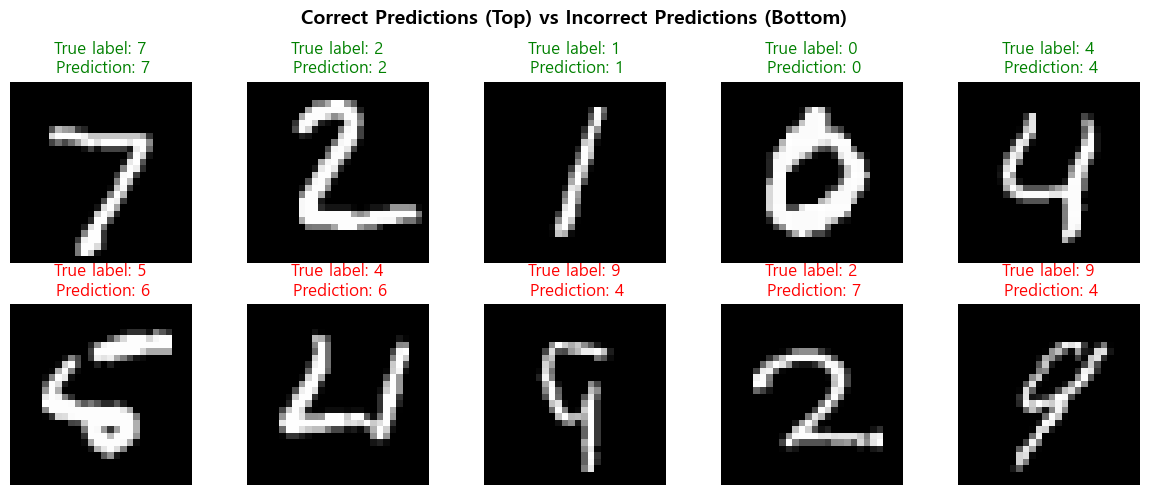

In [27]:
# 예측 결과 시각화하기

# 2행 5열의 서브플롯 생성
fig, axes = plt.subplots(2, 5, figsize=(12, 5)) # figsize는 12인치 x 5인치 크기

# 맞은 예측 5개
# i = 번호, img = 이미지, true_label = 정답 레이블, pred_label = 예측 레이블
for i, (img, true_label, pred_label) in enumerate(correct_examples):
    # 이미지 출력
    # axes[0,i] = 첫번째 행, i번째 열
    # reshape(28, 28) = [784] 1차원을 [28, 28] 2차원으로 변환
    axes[0, i].imshow(img.reshape(28, 28), cmap='gray') 
    axes[0, i].set_title(f'True label: {true_label}\n Prediction: {pred_label}', color='green')
    # axis('off') = 축 숨기기
    axes[0, i].axis('off')

# 틀린 예측 5개
for i, (img, true_label, pred_label) in enumerate(wrong_examples):
    axes[1, i].imshow(img.reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'True label: {true_label}\n Prediction: {pred_label}', color='red')
    axes[1, i].axis('off')

plt.suptitle('Correct Predictions (Top) vs Incorrect Predictions (Bottom)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show() 